In [ ]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import accuracy_score
import time

In [ ]:
mnist = load_digits()
X = mnist.data
y = mnist.target

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
models = {
    "SVM": SVC(random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=10000, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42)
}

**Обучение моделей на исходных данных**

In [ ]:
model_accuracies_original = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name}: Accuracy - {accuracy}")
    model_accuracies_original.append(accuracy)

SVM: Accuracy - 0.9861111111111112
Logistic Regression: Accuracy - 0.9722222222222222
Decision Tree: Accuracy - 0.8416666666666667


**Использование PCA и t-SNE для снижения размерности**

In [ ]:
pca = PCA(n_components=0.90, random_state=42)
start_train_time_pca = time.time()
X_train_pca = pca.fit_transform(X_train)
train_time_pca = time.time() - start_train_time_pca

start_test_time_pca = time.time()
X_test_pca = pca.transform(X_test)
test_time_pca = time.time() - start_test_time_pca
print(f"Number of components to explain 90% variance in PCA: {pca.n_components_}\n")
print(f"Время препроцессинга PCA (train): {train_time_pca}, с")
print(f"Время препроцессинга PCA (test): {test_time_pca}, с")
print(f"Время препроцессинга PCA (сумма): {train_time_pca + test_time_pca}, с")

Number of components to explain 90% variance in PCA: 21

Время препроцессинга PCA (train): 0.018010616302490234, с
Время препроцессинга PCA (test): 0.004974365234375, с
Время препроцессинга PCA (сумма): 0.022984981536865234, с


In [ ]:
tsne = TSNE(n_components=2, random_state=42)
start_train_time_tsne = time.time()
X_tsne = tsne.fit_transform(X)
train_time_tsne = time.time() - start_train_time_tsne
print(f"Время препроцессинга t-SNE: {train_time_tsne}, с")

Время препроцессинга t-SNE: 12.90140962600708, с


**Обучение моделей на сниженной размерности**

In [ ]:
model_accuracies_pca = []
for name, model in models.items():
    model.fit(X_train_pca, y_train)
    y_pred = model.predict(X_test_pca)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} on PCA: Accuracy - {accuracy}")
    model_accuracies_pca.append(accuracy)

SVM on PCA: Accuracy - 0.9861111111111112
Logistic Regression on PCA: Accuracy - 0.9583333333333334
Decision Tree on PCA: Accuracy - 0.8666666666666667


In [ ]:
model_accuracies_tsne = []
for name, model in models.items():
    model.fit(X_tsne, y)
    y_pred = model.predict(X_tsne)
    accuracy = accuracy_score(y, y_pred)
    print(f"{name} on t-SNE: Accuracy - {accuracy}")
    model_accuracies_tsne.append(accuracy)

SVM on t-SNE: Accuracy - 0.9760712298274903
Logistic Regression on t-SNE: Accuracy - 0.9232053422370617
Decision Tree on t-SNE: Accuracy - 1.0


**Результаты**

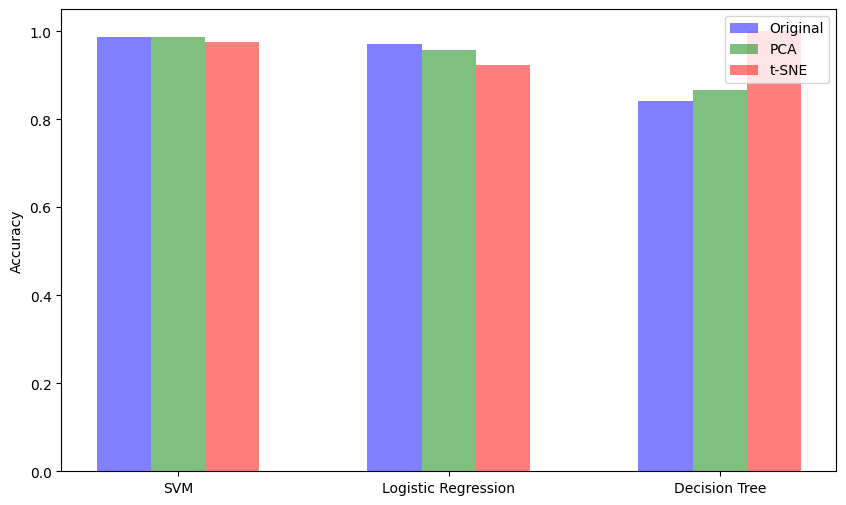

In [ ]:
import matplotlib.pyplot as plt

model_names = list(models.keys())

accuracies_original = model_accuracies_original
accuracies_pca = model_accuracies_pca
accuracies_tsne = model_accuracies_tsne

bar_width = 0.2

plt.figure(figsize=(10, 6))

positions_original = [i for i in range(len(model_names))]
positions_pca = [i + bar_width for i in range(len(model_names))]
positions_tsne = [i + 2 * bar_width for i in range(len(model_names))]

plt.bar(positions_original, accuracies_original, bar_width, label='Original', color='blue', alpha=0.5)
plt.bar(positions_pca, accuracies_pca, bar_width, label='PCA', color='green', alpha=0.5)
plt.bar(positions_tsne, accuracies_tsne, bar_width, label='t-SNE', color='red', alpha=0.5)

plt.ylabel('Accuracy')
plt.xticks([r + bar_width for r in range(len(model_names))], model_names)
plt.legend()

plt.show()

**1. SVM**
- алгоритм PCA: результаты такие же
- алгоритм t-SNE: результаты хуже

**2. Logistic Regression**
- алгоритм PCA: результаты хуже
- алгоритм t-SNE: результаты хуже

**3. Decision Tree**
- алгоритм PCA: результаты лучше
- алгоритм t-SNE: результаты лучше

Какое количество компонент необходимо, чтобы описать 90% дисперсии в PCA?

**Ответ: 21 компонент.**

**1. PCA**
- время препроцессинга PCA (train): 0.02, с
- время препроцессинга PCA (test): 0.005, с
- время препроцессинга PCA (сумма): 0.02, с

**2. t-SNE**
- время препроцессинга t-SNE: 12.9, с